# MultiJob class development
14/09/20

Working up class-based job handling, see in particular [XeF2 work for a prototype](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html).

## Setup

In [1]:
!hostname

bemo


In [2]:
!conda env list

# conda environments:
#
base                     /home/femtolab/anaconda3
chem                     /home/femtolab/anaconda3/envs/chem
chem3.5                  /home/femtolab/anaconda3/envs/chem3.5
dbtest                   /home/femtolab/anaconda3/envs/dbtest
epsdev                *  /home/femtolab/anaconda3/envs/epsdev
epsdev-150320            /home/femtolab/anaconda3/envs/epsdev-150320
espressoDB               /home/femtolab/anaconda3/envs/espressoDB
fibre-sim                /home/femtolab/anaconda3/envs/fibre-sim
py2.7                    /home/femtolab/anaconda3/envs/py2.7
remote                   /home/femtolab/anaconda3/envs/remote
slides                   /home/femtolab/anaconda3/envs/slides
webDev                   /home/femtolab/anaconda3/envs/webDev



In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

* plotly not found, plotly plots not available. 
* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
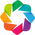

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# Assume job/orb dir format

# Set/check working dir - set for N2O data on Stimpy
currDir = os.getcwd()
if winFlag:
    workingDir = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # UB20 VM shared dir
else:
#     workingDir = r'/mnt/diskstationSSHFS/homes/admin/CloudStation/Backup/STIMPY/D/projects/ePolyScat/n2' # N2 test dataset
    workingDir = r'/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV' # XeF2 test dataset
#     workingDir = !pwd

print(workingDir)


# Scan for subdirs, based on existing routine in getFiles()
fileBase = workingDir
fType = ''
fList = [os.path.join(fileBase, f) for f in os.listdir(fileBase) if f.endswith(fType)]

# For other methods overview/refresher, see 
#  - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
#  - https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
#  - Fast recursive subdir (with scandir) https://stackoverflow.com/a/59803793/2441026
# Also epsman routines.

/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV


In [7]:
fList

['/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb22_E1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb22_E1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePol

In [8]:
os.listdir(fileBase)

['orb12_A1G_idy',
 'orb12_A1G_waveFn',
 'orb13_E1G_idy',
 'orb13_E1G_waveFn',
 'orb15_E2G_idy',
 'orb15_E2G_waveFn',
 'orb21_A1G_idy',
 'orb21_A1G_waveFn',
 'orb22_E1G_idy',
 'orb22_E1G_waveFn',
 'orb24_E2G_idy',
 'orb24_E2G_waveFn',
 'xef2_1.0-60.1eV_orb12_A1G.inp',
 'xef2_1.0-60.1eV_orb12_A1G.inp.err',
 'xef2_1.0-60.1eV_orb12_A1G.inp.out',
 'xef2_1.0-60.1eV_orb13_E1G.inp',
 'xef2_1.0-60.1eV_orb13_E1G.inp.err',
 'xef2_1.0-60.1eV_orb13_E1G.inp.out',
 'xef2_1.0-60.1eV_orb15_E2G.inp',
 'xef2_1.0-60.1eV_orb15_E2G.inp.err',
 'xef2_1.0-60.1eV_orb15_E2G.inp.out',
 'xef2_1.0-60.1eV_orb21_A1G.inp',
 'xef2_1.0-60.1eV_orb21_A1G.inp.err',
 'xef2_1.0-60.1eV_orb21_A1G.inp.out',
 'xef2_1.0-60.1eV_orb22_E1G.inp',
 'xef2_1.0-60.1eV_orb22_E1G.inp.err',
 'xef2_1.0-60.1eV_orb22_E1G.inp.out',
 'xef2_1.0-60.1eV_orb24_E2G.inp',
 'xef2_1.0-60.1eV_orb24_E2G.inp.err',
 'xef2_1.0-60.1eV_orb24_E2G.inp.out']

In [9]:
list(Path(fileBase).iterdir())

[PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_waveFn'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_waveFn'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_waveFn'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_waveFn'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb22_E1G_idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/

In [10]:
list(os.scandir(fileBase))

[<DirEntry 'orb12_A1G_idy'>,
 <DirEntry 'orb12_A1G_waveFn'>,
 <DirEntry 'orb13_E1G_idy'>,
 <DirEntry 'orb13_E1G_waveFn'>,
 <DirEntry 'orb15_E2G_idy'>,
 <DirEntry 'orb15_E2G_waveFn'>,
 <DirEntry 'orb21_A1G_idy'>,
 <DirEntry 'orb21_A1G_waveFn'>,
 <DirEntry 'orb22_E1G_idy'>,
 <DirEntry 'orb22_E1G_waveFn'>,
 <DirEntry 'orb24_E2G_idy'>,
 <DirEntry 'orb24_E2G_waveFn'>,
 <DirEntry 'xef2_1.0-60.1eV_orb12_A1G.inp'>,
 <DirEntry 'xef2_1.0-60.1eV_orb12_A1G.inp.err'>,
 <DirEntry 'xef2_1.0-60.1eV_orb12_A1G.inp.out'>,
 <DirEntry 'xef2_1.0-60.1eV_orb13_E1G.inp'>,
 <DirEntry 'xef2_1.0-60.1eV_orb13_E1G.inp.err'>,
 <DirEntry 'xef2_1.0-60.1eV_orb13_E1G.inp.out'>,
 <DirEntry 'xef2_1.0-60.1eV_orb15_E2G.inp'>,
 <DirEntry 'xef2_1.0-60.1eV_orb15_E2G.inp.err'>,
 <DirEntry 'xef2_1.0-60.1eV_orb15_E2G.inp.out'>,
 <DirEntry 'xef2_1.0-60.1eV_orb21_A1G.inp'>,
 <DirEntry 'xef2_1.0-60.1eV_orb21_A1G.inp.err'>,
 <DirEntry 'xef2_1.0-60.1eV_orb21_A1G.inp.out'>,
 <DirEntry 'xef2_1.0-60.1eV_orb22_E1G.inp'>,
 <DirEntry 'xef2_

In [11]:
# os.walk provides dirs and files as separate lists.
dirList = list(os.walk(fileBase))   # This will pull everything, inc. subdir contents, with tuple per dir
dirListN = next(os.walk(fileBase))  # With next to scan only root dir.

# With abs path
paths = [os.path.join(fileBase, fn) for fn in next(os.walk(fileBase))[1]]

In [12]:
dirListN

('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV',
 ['orb12_A1G_idy',
  'orb12_A1G_waveFn',
  'orb13_E1G_idy',
  'orb13_E1G_waveFn',
  'orb15_E2G_idy',
  'orb15_E2G_waveFn',
  'orb21_A1G_idy',
  'orb21_A1G_waveFn',
  'orb22_E1G_idy',
  'orb22_E1G_waveFn',
  'orb24_E2G_idy',
  'orb24_E2G_waveFn'],
 ['xef2_1.0-60.1eV_orb12_A1G.inp',
  'xef2_1.0-60.1eV_orb12_A1G.inp.err',
  'xef2_1.0-60.1eV_orb12_A1G.inp.out',
  'xef2_1.0-60.1eV_orb13_E1G.inp',
  'xef2_1.0-60.1eV_orb13_E1G.inp.err',
  'xef2_1.0-60.1eV_orb13_E1G.inp.out',
  'xef2_1.0-60.1eV_orb15_E2G.inp',
  'xef2_1.0-60.1eV_orb15_E2G.inp.err',
  'xef2_1.0-60.1eV_orb15_E2G.inp.out',
  'xef2_1.0-60.1eV_orb21_A1G.inp',
  'xef2_1.0-60.1eV_orb21_A1G.inp.err',
  'xef2_1.0-60.1eV_orb21_A1G.inp.out',
  'xef2_1.0-60.1eV_orb22_E1G.inp',
  'xef2_1.0-60.1eV_orb22_E1G.inp.err',
  'xef2_1.0-60.1eV_orb22_E1G.inp.out',
  'xef2_1.0-60.1eV_orb24_E2G.inp',
  'xef2_1.0-60.1eV_orb24_E2G.inp.err',
  'xef2_1.0-60.1eV_orb24_E2G.inp.o

In [13]:
paths

['/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb13_E1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb15_E2G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb21_A1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb22_E1G_idy',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb22_E1G_waveFn',
 '/mnt/femtofastSSHFS/FemtoShare/Results/ePol

In [14]:
# Equivalent with pathlib
# https://stackoverflow.com/a/30925692
test = [p for p in Path(fileBase).iterdir() if (p.is_dir())]

In [15]:
list(test[0].iterdir())

[PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_idy/xef2SPUCPU.idy'),
 PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV/orb12_A1G_idy/xef2SSUCSU.idy')]

In [16]:
[entry for entry in os.scandir(fileBase) if entry.is_dir()]

[<DirEntry 'orb12_A1G_idy'>,
 <DirEntry 'orb12_A1G_waveFn'>,
 <DirEntry 'orb13_E1G_idy'>,
 <DirEntry 'orb13_E1G_waveFn'>,
 <DirEntry 'orb15_E2G_idy'>,
 <DirEntry 'orb15_E2G_waveFn'>,
 <DirEntry 'orb21_A1G_idy'>,
 <DirEntry 'orb21_A1G_waveFn'>,
 <DirEntry 'orb22_E1G_idy'>,
 <DirEntry 'orb22_E1G_waveFn'>,
 <DirEntry 'orb24_E2G_idy'>,
 <DirEntry 'orb24_E2G_waveFn'>]

Compatibility...

- Old structure, with multiple orb output files per dir (but not per E range).
- New structure, with multiple output files per E range, subdirs per orb

Should scan dirs for file types or by stem to confirm?  See ePSman code for ideas...

Maybe just assume that if files are in root dir no E stacking is required? This would fail for single job case however.

How about checking for prefixes, as per wfPlot.py code? Uses epsproc.util.fileListSort to set prefix.

In [17]:
# Equivalent with pathlib
# https://stackoverflow.com/a/30925692 + filter on dir name
test = [p for p in Path(fileBase).iterdir() if (p.is_dir() and p.stem.startswith('orb') and not p.stem.endswith(('idy','waveFn')))]

In [18]:
# Equivalent with pathlib
# https://stackoverflow.com/a/30925692 + glob for .out files
test = [p for p in Path(fileBase).iterdir() if (p.is_dir() and bool(list(p.glob('*.out'))))] # Subdirs only - NOT ROOT!
# test = [p for p in Path(fileBase).iterdir() if (p.is_dir() and bool(list(p.glob('*.idy'))))] # All dirs - NOT ROOT!

In [19]:
test

[]

In [20]:
# list(Path(fileBase).iterdir()).glob('*.out'))

In [21]:
# Use dirList (from os.walk) to select dirs - shoul
# for root, dirs, files in os.walk(fileBase):
#     for file in files:
#         if file.endswith

In [22]:
# for root, dirs, files in os.walk(directory):
#     for file in files:
#         if file.endswith('.txt'):
#             print file

## Class dev

In [23]:
# Class for multiple ePS datasets

class ePSmultiJob():
    """
    Class for handling multiple ePS jobs/datasets.
    
    TODO: 
    
    - verbosity levels, subtract for subfunctions? Or use a dict to handle multiple levels?
    
    """
    
    # TODO: set to varg in for jobs dict
    def __init__(self, fileBase = None, jobDirs = None, jobStructure = None, 
                 prefix = None, ext = '.out', verbose = 1):
        
        self.verbose = verbose
        
        # Set file properties
        self.jobs = {'fileBase':Path(fileBase),
                     'ext':ext,
                     'prefix':prefix,
                     'jobDirs':jobDirs,
                     'jobStructure':jobStructure}
        
        if jobDirs is None:
            if verbose:
                print(f"Scanning {fileBase} for ePS jobs.")
            
            self.scanDirs()
        
        
    def scanDirs(self):
        """
        Scan dir structure for folders containing ePS files.
        
        Compatibility... this assumes one of two dir structures:

        - Old structure, with multiple job output files per dir (but not per E range).
        - New structure, with multiple output files per E range, subdirs per job/orb.
        
        
        """
        
        # Scan dirs with pathlib
        # https://stackoverflow.com/a/30925692, + glob for .out files
        # Subdirs only - NOT ROOT!
        testSub = [p for p in self.jobs['fileBase'].iterdir() if (p.is_dir() and bool(list(p.glob(f"*{self.jobs['ext']}"))))] 
    
        if testSub and (self.jobs['jobStructure'] is None or 'subDir'):
            self.jobs['jobDirs'] = testSub
            self.jobs['jobStructure'] = 'subDir'
            
            if self.verbose > 0:
                print(f"Found ePS output files in subdirs: {testSub}")
                
    
        # Check root dir
        testRoot = list(self.jobs['fileBase'].glob(f"*{self.jobs['ext']}"))
    
        if testRoot and (self.jobs['jobStructure'] is None or 'rootDir'):
            self.jobs['jobDirs'] = [self.jobs['fileBase']]
            self.jobs['jobStructure'] = 'rootDir'
            
            if self.verbose > 0:
                print(f"Found ePS output files in root dir {self.jobs['fileBase']}.")
        
                                                        
    def scanFiles(self):
        """
        Scan ePS output files from dir list.
        
        Adapted from https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html
        
        Currently outputting complicated dataSets dictionary/list - need to sort this out!
        - Entry per dir scanned.
        - Sub-entries per file, but collapsed in some cases.
        - Sending to Xarray dataset with orb labels should be cleaner.
        
        TODO: 
        
        - convert outputs to Xarray dataset. Did this before, but currently missing file (on AntonJr)! CHECK BACKUPS.
        - Confirm HV scaling - may be better to redo this, rather than correct existing values?
        
        """
        
        dataSets = {}  # Set dict to hold all data for the moment.
        jobs = {}  # Set dict to hold summary info

        for n, dirScan in enumerate(self.jobs['jobDirs']):
#             dataPath = Path(workingDir[0], dirScan)  
            dataPath = dirScan  # Assume abs paths (?)

            # For dir scan
            dataSetXS = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection', verbose = self.verbose)  # Set for XS + betas only
            dataSetMatE = ep.readMatEle(fileBase = dataPath, recordType = 'DumpIdy', verbose = self.verbose)

            # Log some details - currently not passed directly from readMatEle()
            fN = len(dataSetXS)  
            fList = [item.attrs['file'] for item in dataSetXS]
            
            if self.jobs['jobStructure'] == 'subDirs' and len(dataSetXS) > 1:
                # Stack multi-E Xarrays into single array.
                # Keep results as list for compatibility with rest of code (otherwise will slice Xarray)
                dataXS = [xr.combine_nested(dataSetXS, concat_dim = ['Eke']).sortby('Eke')]
                dataMatE = [xr.combine_nested(dataSetMatE, concat_dim = ['Eke']).sortby('Eke')]
                
                # Set job info from first datafile of each set (orbital)
                dataFile = Path(dataXS[0].attrs['fileBase'], dataXS[0].attrs['file'])
                dataXS[0].attrs['jobInfo'] = ep.headerFileParse(dataFile, verbose = self.verbose)
                dataXS[0].attrs['molInfo'] = ep.molInfoParse(dataFile, verbose = self.verbose)
                
                # Set orb info
                dataXS[0].attrs['orbX'], dataXS[0].attrs['orbInfo'] = ep.summary.getOrbInfo(dataXS[0].attrs['jobInfo'], dataXS[0].attrs['molInfo'])
                
                # Set absolute photon energy
                dataXS[0]['Ehv'] = dataXS[0]['Ehv'] - (float(dataXS[0].jobInfo['IPot']) + dataXS[0].orbX['E'])
                dataMatE[0]['Ehv'] = dataXS[0]['Ehv'] - (float(dataXS[0].jobInfo['IPot']) + dataXS[0].orbX['E'])

            else:
                dataXS = dataSetXS
                dataMatE = dataSetMatE

                
                # Set job info for each file
                for m, item in enumerate(dataXS):
                    dataFile = Path(item.attrs['fileBase'], dataXS[0].attrs['file'])
                    dataXS[m].attrs['jobInfo'] = ep.headerFileParse(dataFile, verbose = self.verbose)
                    dataXS[m].attrs['molInfo'] = ep.molInfoParse(dataFile, verbose = self.verbose)

                    # Set orb info
                    dataXS[m].attrs['orbX'], dataXS[m].attrs['orbInfo'] = ep.summary.getOrbInfo(dataXS[m].attrs['jobInfo'], dataXS[m].attrs['molInfo'])
                
                    # Set absolute photon energy
                    dataXS[m]['Ehv'] = dataXS[m]['Ehv'] - (float(dataXS[m].jobInfo['IPot']) + dataXS[m].orbX['E'].data[0])
                    dataMatE[m]['Ehv'] = dataXS[m]['Ehv'] - (float(dataXS[m].jobInfo['IPot']) + dataXS[m].orbX['E'].data[0])
                
                
#             # Set job info from first datafile of each set (orbital)
#             dataFile = Path(dataXS[0].attrs['fileBase'], dataXS[0].attrs['file'])
#             dataXS[0].attrs['jobInfo'] = ep.headerFileParse(dataFile)
#             dataXS[0].attrs['molInfo'] = ep.molInfoParse(dataFile)
#             dataXS.attrs['jobInfo'] = ep.headerFileParse(dataFile)
#             dataXS.attrs['molInfo'] = ep.molInfoParse(dataFile)

            dataSets[n] = {}
            dataSets[n]['dir'] = dirScan
            dataSets[n]['XS'] = dataXS
            dataSets[n]['matE'] = dataMatE
            
            jobs[n] = {'dir': dirScan, 'fN': fN, 'fList': fList}
            
        self.dataSets = dataSets
        self.jobs['files'] = jobs
        
        if self.verbose:
            self.jobsSummary()
            
            
    def jobsSummary(self):
        """
        Print some general info.
        
        TODO: add some info!
        """
        
        
        fN = [len(item['fList']) for item in self.jobs['files'].values()]
        print(f"Found {len(self.jobs['files'])} directories, with {sum(fN)} files.")
        
        
        # Print job details
#         [ep.jobSummary(testClass.dataSets[0]['XS'][1].jobInfo);
        

    # Define photon energy scale - now set at read-in.
#     def setHV(self):
        
#         # Set Ehv scale - currently incorrectly set by 1st vertical IP
#         for n, key in enumerate(self.dataSets):
#         #     dataSets[key][0]['Ehv'] -= (12.35 + orbIPs[n])
#             dataSets[key]['XS'][0]['Ehv'] = dataSets[key]['XS'][0]['Ehv'] - (12.35 + orbIPs[n])
#             dataSets[key]['matE'][0]['Ehv'] = dataSets[key]['matE'][0]['Ehv'] - (12.35 + orbIPs[n])

#             jobInfo['IPot']


    def plotGetCro(self, pType = 'SIGMA', Erange = None, Etype = 'Eke'):
            
#         if self.jobs['jobStructure'] == 'subDirs':
        for key in self.dataSets:
#                 testClass.dataSets[key]['XS'][0].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x='Eke', col='Type')   # This works
            for m, item in enumerate(self.dataSets[key]['XS']):
        
                # Set default to full range, same for all cases
                if Erange is None:
                    Erange = [self.dataSets[key]['XS'][m][Etype].min().data, self.dataSets[key]['XS'][m][Etype].max().data]
        
        
                # More elegant way to swap on dims?
                if Etype == 'Ehv':
                    self.dataSets[key]['XS'][m].swap_dims({'Eke':'Ehv'}).sel(XC=pType, **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # With dict unpacking for var as keyword
                else:
                    self.dataSets[key]['XS'][m].sel(XC=pType, **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # With dict unpacking for var as keyword

                    
#         else:
            

### File IO

In [24]:
testClass = ePSmultiJob(fileBase, verbose = 0)

In [25]:
testClass.scanFiles()

In [26]:
testClass.jobsSummary()

Found 1 directories, with 6 files.


In [27]:
testClass.jobs

{'fileBase': PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV'),
 'ext': '.out',
 'prefix': None,
 'jobDirs': [PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV')],
 'jobStructure': 'rootDir',
 'files': {0: {'dir': PosixPath('/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV'),
   'fN': 6,
   'fList': ['xef2_1.0-60.1eV_orb12_A1G.inp.out',
    'xef2_1.0-60.1eV_orb13_E1G.inp.out',
    'xef2_1.0-60.1eV_orb15_E2G.inp.out',
    'xef2_1.0-60.1eV_orb21_A1G.inp.out',
    'xef2_1.0-60.1eV_orb22_E1G.inp.out',
    'xef2_1.0-60.1eV_orb24_E2G.inp.out']}}}

In [28]:
# temp = testClass.dataSets[0]['XS'][0].swap_dims({'Eke':'Ehv'}).Ehv.min().data
testClass.dataSets[0]['XS'][0].Ehv.min().data

array(704.98848886)

In [29]:
print(temp*2)

NameError: name 'temp' is not defined

In [ ]:
float(testClass.dataSets[0]['XS'][0].jobInfo['IPot']) *2

In [ ]:
# THis is a bit unwieldy for multiple files...?
# [ep.jobSummary(item['XS'][0].jobInfo) for item in testClass.dataSets.values()] #, testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
testClass.dataSets[0]['XS'][0].jobInfo

## Plotting

In [ ]:
Erange = [0, 60]
Etype = 'Eke'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    testClass.dataSets[key]['XS'][0].sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

In [ ]:
Erange = [700, 800]
Etype = 'Ehv'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    
    testClass.dataSets[key]['XS'][0].swap_dims({'Eke':'Ehv'}).sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

#     temp = testClass.dataSets[key]['XS'][0].copy().swap_dims({'Eke':'Ehv'})
#     temp.sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x='Ehv', col='Type')   # This works

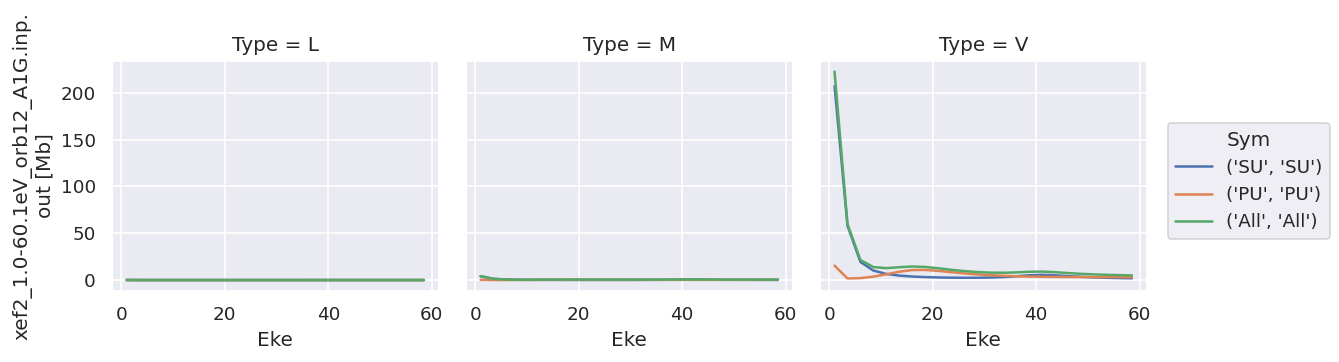

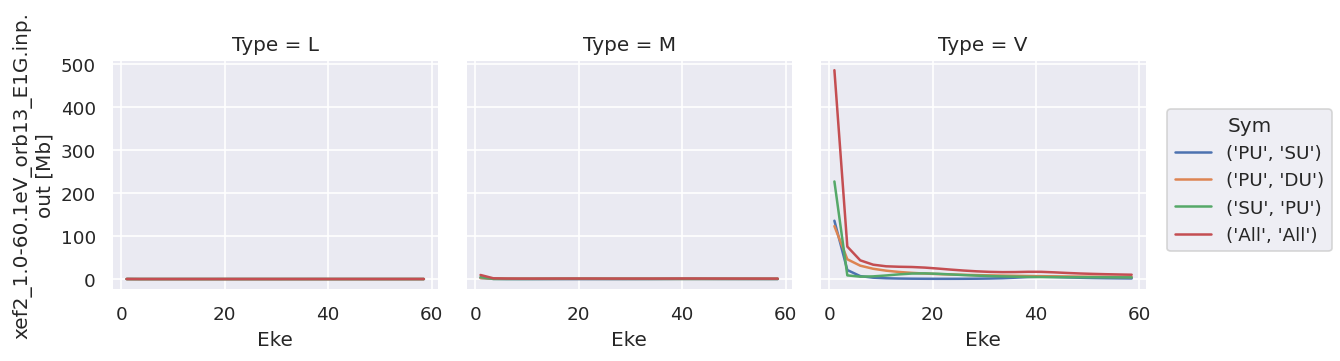

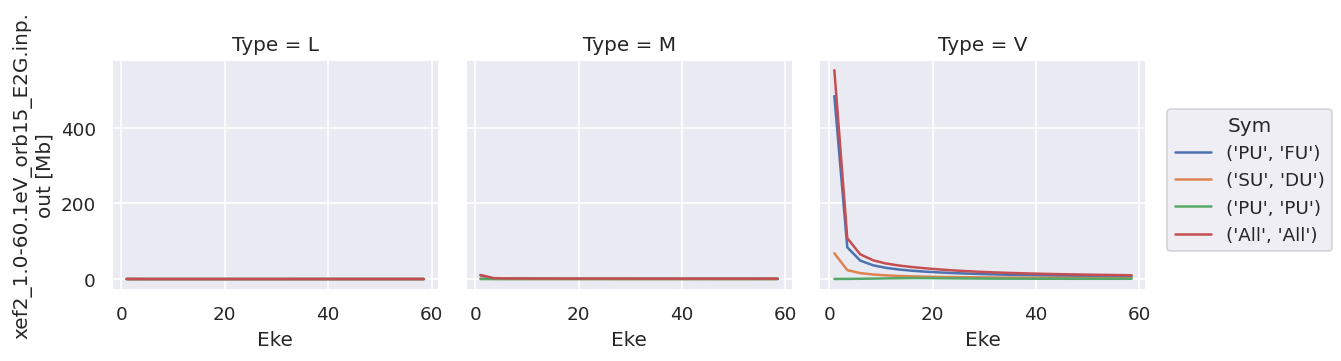

In [31]:
testClass.plotGetCro(Etype='Eke')

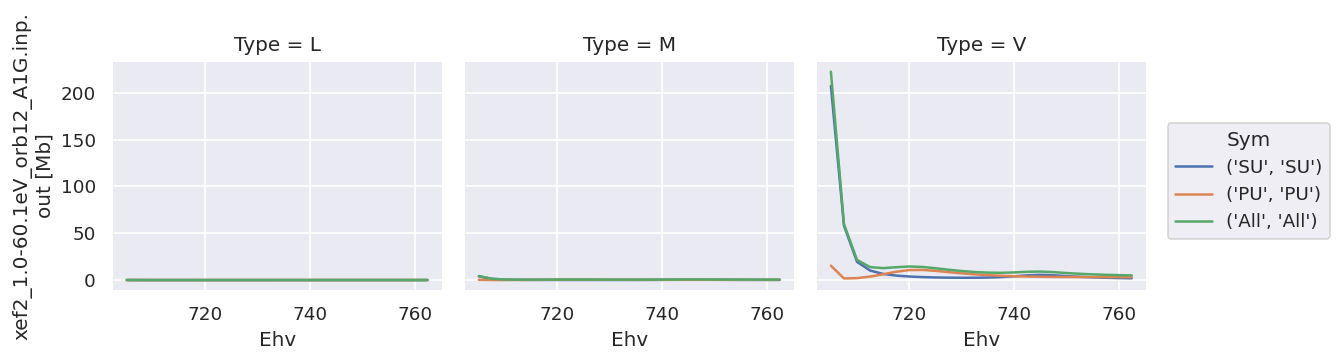

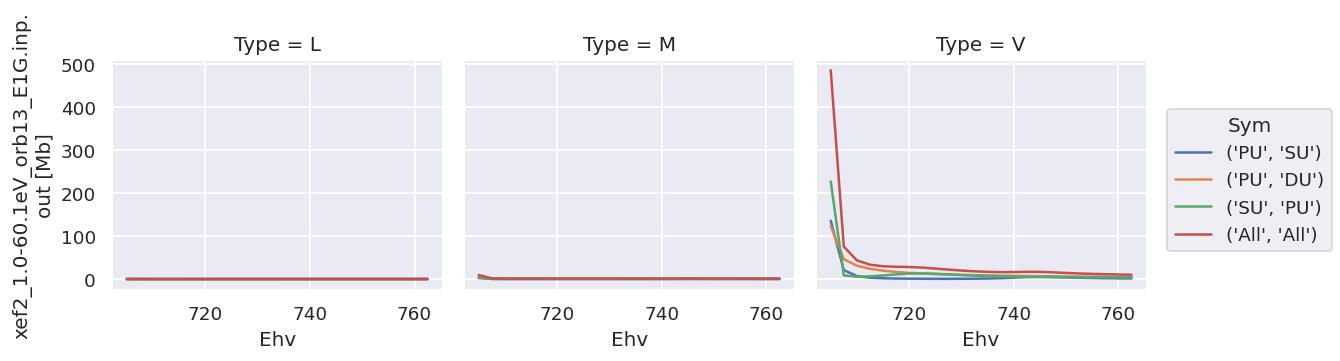

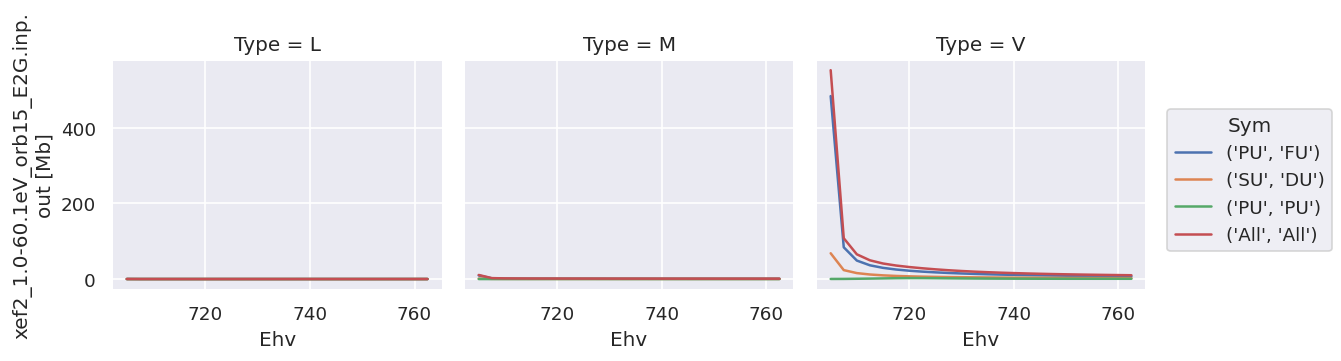

In [32]:
testClass.plotGetCro(Etype='Ehv')

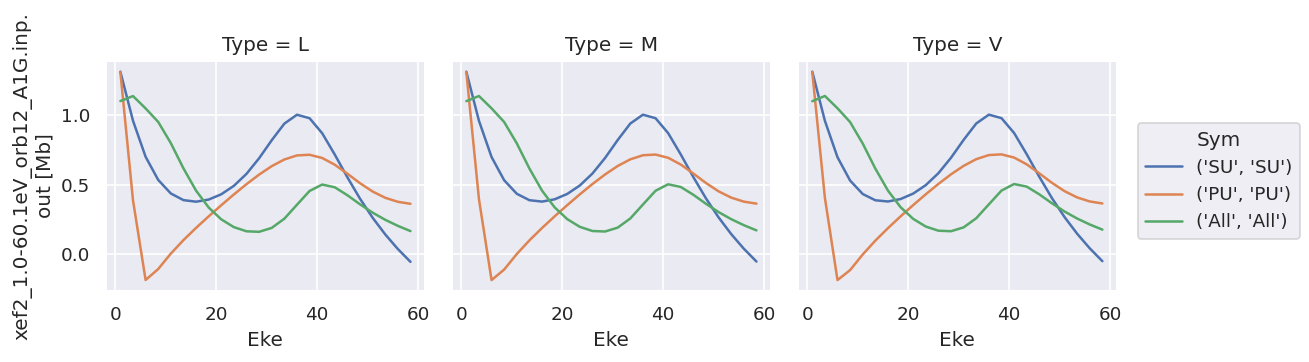

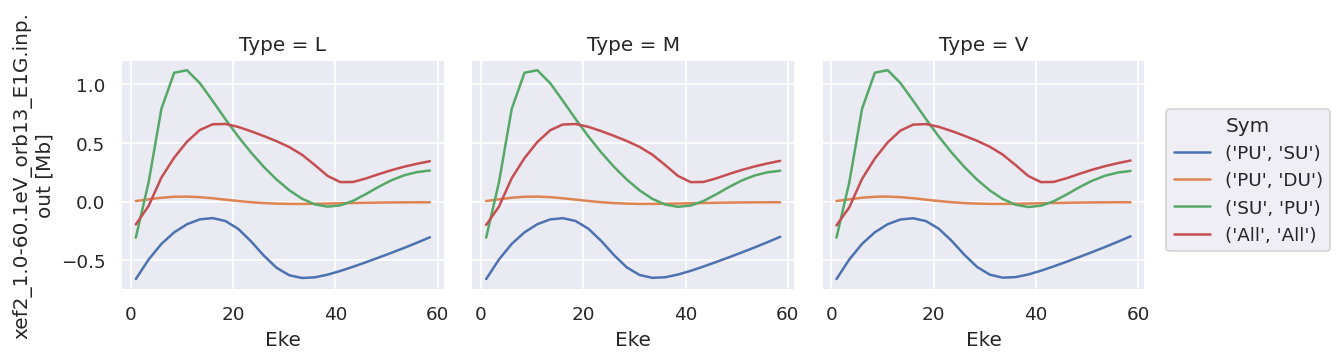

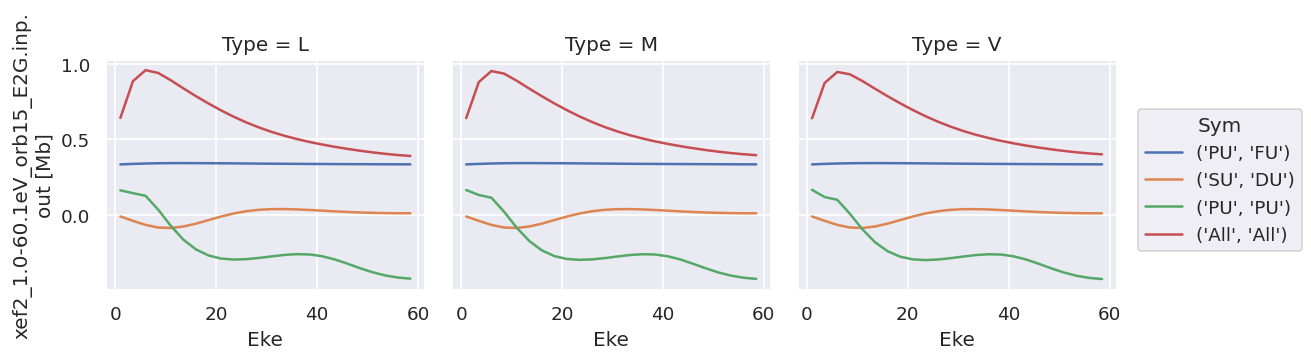

In [33]:
testClass.plotGetCro(pType='BETA', Etype='Eke')

## Scratch

In [ ]:
(testClass.dataSets[0]['XS'][0].attrs['file'])

In [ ]:
fList = [item.attrs['file'] for item in testClass.dataSets[0]['XS']]
fList

In [ ]:

fN = [len(item['fList']) for item in testClass.jobs['files'].values()]
sum(fN)

In [ ]:
testClass.jobs['files'].values()

In [ ]:
type(testClass.dataSets)

In [ ]:
testClass.dataSets.keys()

In [ ]:
# testClass.dataSets[0]['XS'][0].attrs
len(testClass.dataSets[0]['XS'])

In [ ]:
testClass.dataSets[0]['XS'][1].attrs['jobInfo']

SEE jobSummary(), jobInfo and molInfo next...

In [ ]:
jobInfo, orbInfo = ep.jobSummary(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbInfo

In [ ]:
testClass.dataSets[0]['XS'][1].molInfo['orbTable'].coords['OrbGrp'] 

In [ ]:
orbX, orbInfo = ep.summary.getOrbInfo(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbX['E'].data[0]

In [ ]:
molInfo = testClass.dataSets[0]['XS'][1].molInfo
orbOut = molInfo['orbTable'].where(molInfo['orbTable'].coords['OrbGrp'] == orbInfo['iOrbGrp'], drop=True)

In [ ]:
orbOut.E

In [ ]:
temp = {}

In [ ]:
temp[1] = 'an item'

In [ ]:
temp